In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

df=pd.read_csv(r'C:\Users\TajwarAbtahee\OneDrive - JCW Resourcing\Desktop\Python\practice\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


###Attribute Information:

age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [4]:
df.shape

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [13]:
len(df[df.duplicated()])*100/len(df) # 70% of the data is duplicated

70.53658536585365

In [14]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape #duplicates removed

(302, 14)

In [17]:
df.describe() #general overview of stats

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
df.corr().style.background_gradient(cmap='RdYlGn')
#there is a positive correlation between chest pain(cp), maximu heart rate(thalach),and slope of peak excersize(slope), with target

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [33]:
hd=df.target.value_counts().reset_index().sort_values('target')
hd

,index,target
1,0,138
0,1,164


C:\Users\TajwarAbtahee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



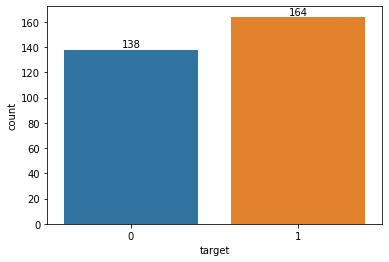

In [34]:
#how many people do and dont have heart disease in this dataset?
ax=sns.countplot(df.target)
ax.bar_label(container=ax.containers[0],labels=hd.target)
plt.show()

# 0 -> no heart disease, 1 -> have heart disease
# more than half of the patients have heart disease

In [46]:
sex=df.sex.value_counts().reset_index()
sex=sex.rename(columns={'index':'gender','sex':'count'})
sex=sex.sort_values('gender')
sex

,gender,count
1,0,96
0,1,206


C:\Users\TajwarAbtahee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



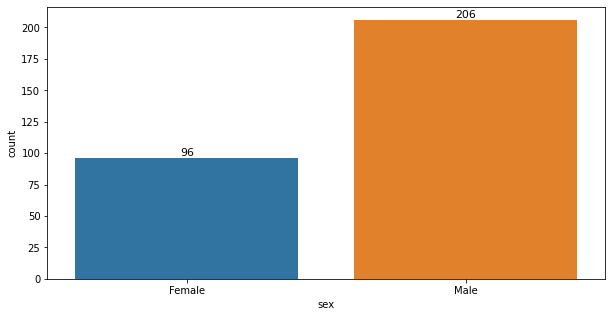

In [55]:
#how many males and females are we working with? 0=female,1=male
plt.figure(figsize=(10,5))
bx=sns.countplot(df.sex)
bx.bar_label(container=bx.containers[0], labels=sex['count'],size=11)
plt.xticks([0,1],['Female','Male'])
plt.show()

In [69]:
#find gender distriburtion wrt. to target
px.histogram(df,x='sex',color='target',barmode='group')

<AxesSubplot:xlabel='age', ylabel='Density'>

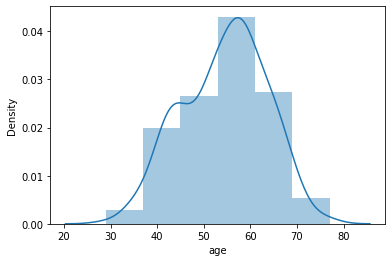

In [77]:
#lets look at the age distribution
sns.distplot(df.age,bins=6)
# most of the pateints are aged between 50-60 years

C:\Users\TajwarAbtahee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



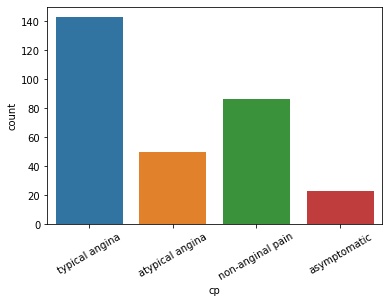

In [81]:
#Check chest pain type
#-	0 = typical angina
#-	1 = atypical angina
#-	2 = non-anginal pain
#-	3 = asymptomatic 

sns.countplot(df.cp)
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'],rotation=30)
plt.show()

#most patients have typical angina

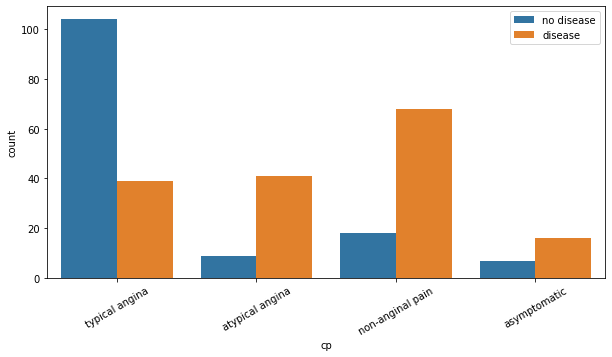

In [90]:
#chest pain distribution wrt. target
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='cp',hue='target')
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'],rotation=30)
plt.legend(labels=['no disease','disease'])
plt.show()

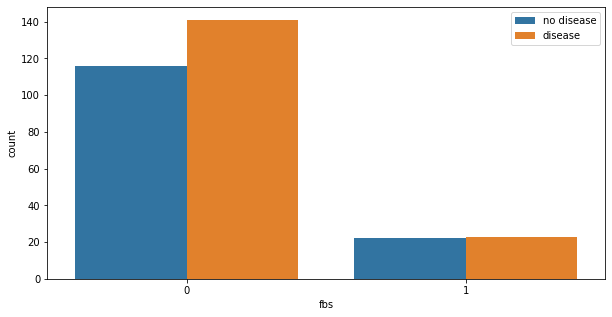

In [91]:
#fasting blood sugar distribution wrt. target
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='fbs',hue='target')
plt.legend(labels=['no disease','disease'])
plt.show()

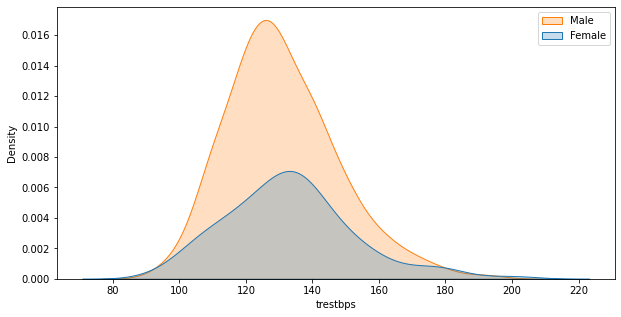

In [103]:
#blood pressure levels wrt sex
plt.figure(figsize=(10,5))
sns.kdeplot(df.trestbps,hue=df.sex,shade=True)
plt.legend(labels=['Male','Female'])
#males have a lower blood pressure rate of around 125 whereas with females its 135

In [114]:
#plot continuous variables

cat_var=[]
cont_var=[]

for column in df.columns:
    if df[column].nunique() <=10:
        cat_var.append(column)
    else:
        cont_var.append(column)

In [115]:
cat_var

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [117]:
cont_var

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

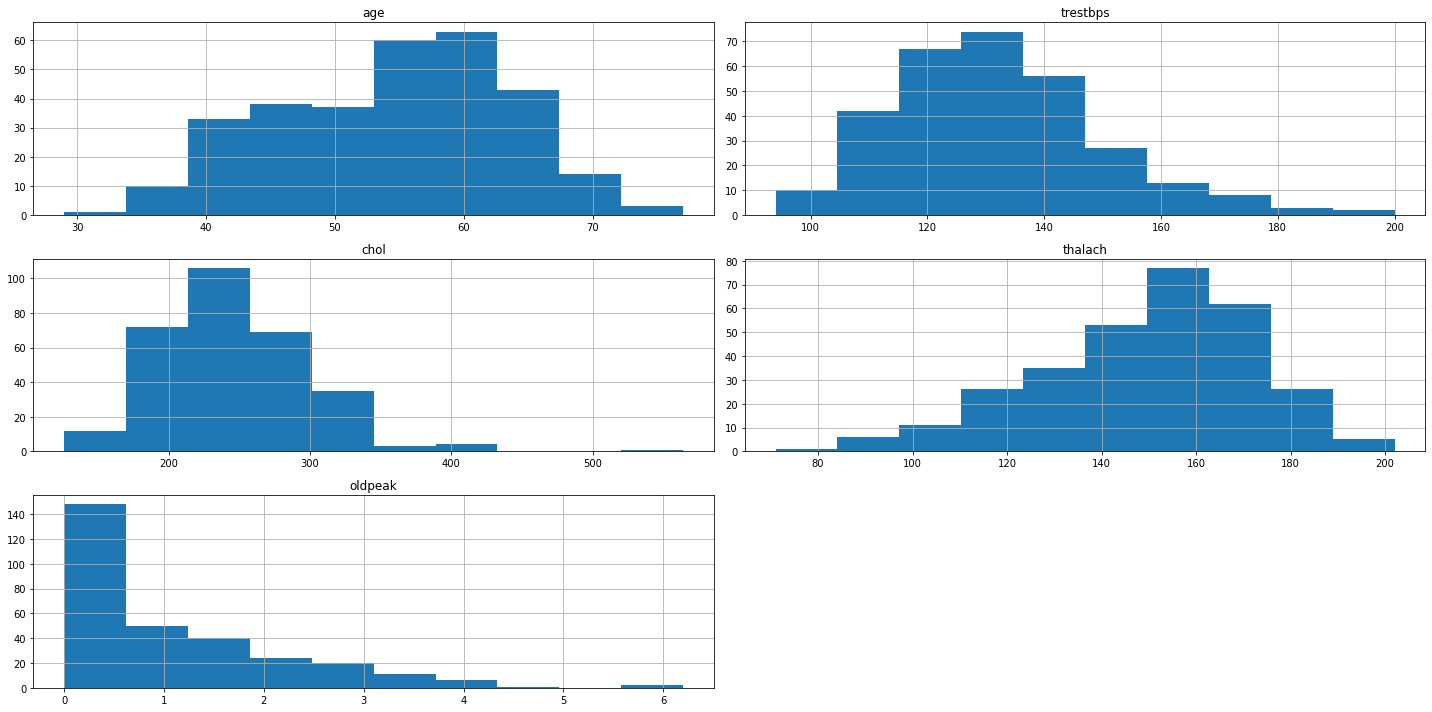

In [130]:
df.hist(cont_var,figsize=(20,10))
plt.tight_layout()
plt.show()

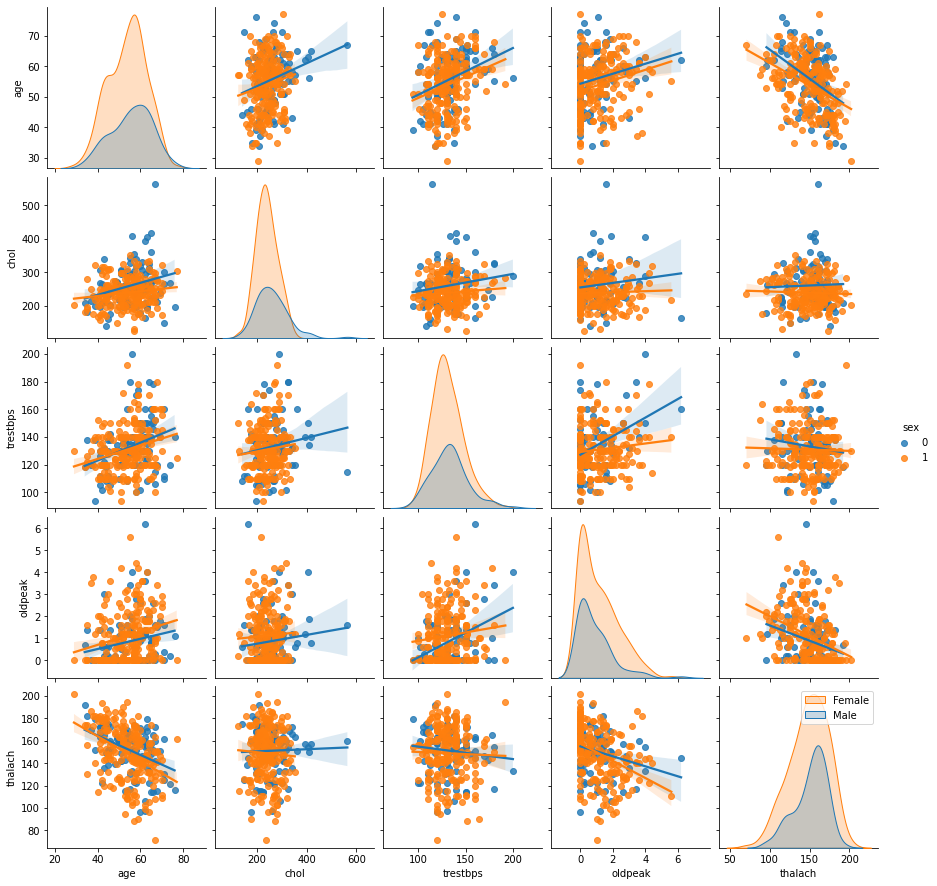

In [136]:
sns.pairplot(df, vars=['age','chol','trestbps','oldpeak','thalach'],kind='reg',hue='sex')
plt.legend(labels=['Female','Male'])
# same method can be applied using a pairplot compared to previous graphs
# chol and oldpeak have a right skew